In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
daily_cases = pd.read_csv('epidemic/cases_state.csv')

In [3]:
population = pd.read_csv('static/population.csv')

In [ ]:
state_pop_dict = {}

for state in population.iterrows():
    if state[0] > 0:
        state_pop_dict[state[1].state] = state[1]['pop']
        # print(state[1].state + ', ' + str(state[1]['pop']))
state_pop_dict

In [20]:
daily_case_pivoted = daily_cases.pivot(index='date', columns='state', values='cases_new').reset_index()

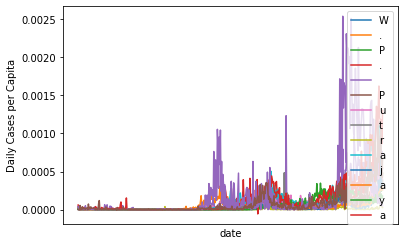

In [39]:
# state = 'Negeri Sembilan'

for x in state_pop_dict:
    plt.plot(daily_case_pivoted['date'], daily_case_pivoted[x]/state_pop_dict[x] )
    plt.legend(x)

plt.xlabel('date')
plt.ylabel('Daily Cases per Capita')
plt.xticks([])
plt.show()

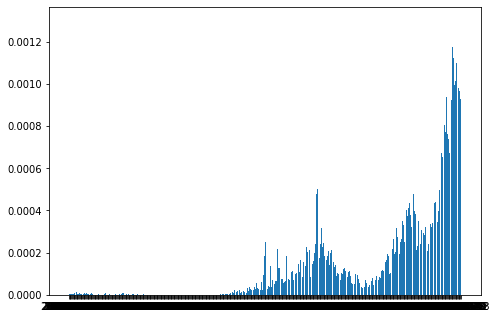

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sel = daily_cases.where(daily_cases['state'] == 'Selangor').dropna()

x = sel['date']
y = sel['cases_new']/state_pop_dict['Selangor']
ax.bar(x, y)
plt.show()

In [43]:
list(state_pop_dict.keys())

['Johor',
 'Kedah',
 'Kelantan',
 'Melaka',
 'Negeri Sembilan',
 'Pahang',
 'Pulau Pinang',
 'Perak',
 'Perlis',
 'Selangor',
 'Terengganu',
 'Sabah',
 'Sarawak',
 'W.P. Kuala Lumpur',
 'W.P. Labuan',
 'W.P. Putrajaya']

In [ ]:
state = 'Negeri Sembilan'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
kel = daily_cases.where(daily_cases['state'] == state).dropna()

x = kel['date']
y = kel['cases_new']/state_pop_dict[state]

ax.bar(x, y)
plt.show()

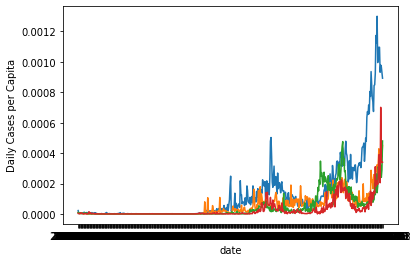

In [34]:
sel = daily_cases.where(daily_cases['state'] == 'Selangor').dropna()

x = sel['date']
y = sel['cases_new']/state_pop_dict['Selangor']
plt.plot(x, y)

state='Pulau Pinang'
kel = daily_cases.where(daily_cases['state'] == state).dropna()
plt.plot(kel['date'], kel['cases_new']/state_pop_dict[state] )

state='Kelantan'
kel = daily_cases.where(daily_cases['state'] == state).dropna()
plt.plot(kel['date'], kel['cases_new']/state_pop_dict[state] )

state='Terengganu'
kel = daily_cases.where(daily_cases['state'] == state).dropna()
plt.plot(kel['date'], kel['cases_new']/state_pop_dict[state] )

plt.xlabel('date')
plt.ylabel('Daily Cases per Capita')
plt.show()

In [23]:
daily_cases.where(daily_cases['state'] == 'Selangor').dropna()

,date,state,cases_new
11,2020-03-16,Selangor,144.0
27,2020-03-17,Selangor,17.0
43,2020-03-18,Selangor,31.0
59,2020-03-19,Selangor,31.0
75,2020-03-20,Selangor,40.0
...,...,...,...
7851,2021-07-19,Selangor,4404.0
7867,2021-07-20,Selangor,5524.0
7883,2021-07-21,Selangor,5550.0
7899,2021-07-22,Selangor,6049.0


In [103]:
cases_mas = pd.read_csv('epidemic/cases_malaysia.csv')
death_mas = pd.read_csv('epidemic/deaths_malaysia.csv')

cases_mas = cases_mas.drop(labels=0, axis=0)
cases_mas = cases_mas.reset_index()

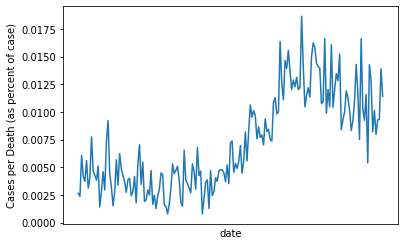

In [120]:
# plt.plot(cases_mas['date'], cases_mas['cases_new'])
deaths = death_mas['deaths_new']
cases = cases_mas['cases_new']

DpC = deaths/cases

plt.plot(death_mas['date'][320:], DpC[320:])

plt.xlabel('date')
plt.ylabel('Cases per Death (as percent of case)')
plt.xticks([])
plt.show()

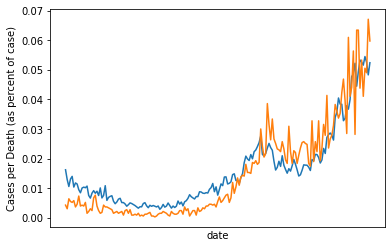

In [131]:
deaths = death_mas['deaths_new']
cases = cases_mas['cases_new']
malaysia_population = 32657400
plt.plot(cases_mas['date'][320:], (100/malaysia_population)*cases[320:])
# plt.plot(death_mas['date'][320:], DpC[320:])
plt.plot(death_mas['date'][320:], (10000/malaysia_population)*deaths[320:])
plt.xlabel('date')
plt.ylabel('Cases per Death (as percent of case)')
plt.xticks([])
plt.show()

In [132]:
testing = pd.read_csv('epidemic/tests_malaysia.csv')

In [133]:
total = testing['rtk-ag'] + testing['pcr']

In [139]:
testing = testing.iloc[53:, :]

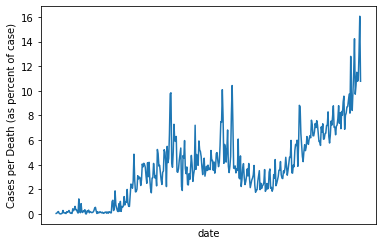

In [162]:
# plt.plot(cases_mas['date'][320:], cases[320:])
# plt.plot(death_mas['date'][320:], DpC[320:])
plt.plot(testing['date'][100:], 100*cases_mas['cases_new'][100:-1]/((testing['pcr'][100:] +  testing['rtk-ag'][100:])))
plt.xlabel('date')
plt.ylabel('Cases per Death (as percent of case)')
plt.xticks([])
plt.show()

In [156]:
df = pd.DataFrame({'a': [0,1,2,3,4]})

In [157]:
df.a[1:-1]

1    1
2    2
3    3
Name: a, dtype: int64